In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Importing Face Mask Detaset**

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
!ls

archive.zip  data  sample_data


In [ ]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/archive.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Importing the Dpendencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3431.jpg', 'with_mask_3188.jpg', 'with_mask_970.jpg', 'with_mask_791.jpg', 'with_mask_1840.jpg']
['with_mask_281.jpg', 'with_mask_2278.jpg', 'with_mask_3301.jpg', 'with_mask_2285.jpg', 'with_mask_771.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1070.jpg', 'without_mask_3316.jpg', 'without_mask_3030.jpg', 'without_mask_3144.jpg', 'without_mask_1773.jpg']
['without_mask_1309.jpg', 'without_mask_416.jpg', 'without_mask_2195.jpg', 'without_mask_2158.jpg', 'without_mask_873.jpg']


In [ ]:
print('number of mask images:', len(with_mask_files))
print('number of without mask images:', len(without_mask_files))

number of mask images: 3725
number of without mask images: 3828


**Creating Labels for the two class of images**

1.   with mask --> 1
2.   without mask --> 0



In [ ]:
# create the labels

with_mask_label = [1]*3725
without_mask_label = [0]*3828

print(with_mask_label[0:5])

print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [ ]:
labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

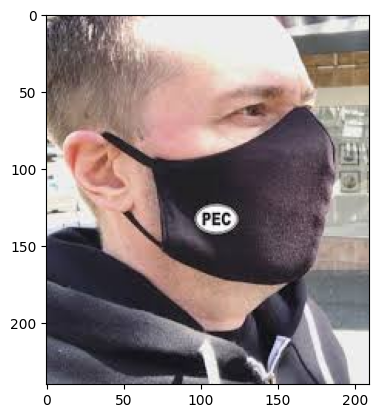

In [ ]:
# displaying with mask image

img = mpimg.imread('/content/data/with_mask/with_mask_2637.jpg')
imgplot  = plt.imshow(img)
plt.show()

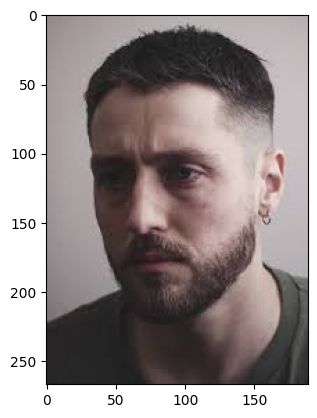

In [ ]:
# displaying without mask image

img = mpimg.imread('/content/data/without_mask/without_mask_3414.jpg')
imgplot  = plt.imshow(img)
plt.show()

In [ ]:
from PIL import Image
import os

# Assuming you're working with images in a directory
folder = '/content/data/with_mask'  # Update with your folder path
img_file = '/content/data/with_mask/with_mask_2.jpg'  # Update with the image file you want to open

image = Image.open(os.path.join(folder, img_file)).resize((224, 224)).convert('RGB')


**Image processing**


1.   Resize the images
2.   Convert the images to numpy arrays



In [ ]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

In [ ]:
type(data)

list

array([[[175, 152, 138],
        [174, 151, 137],
        [175, 152, 138],
        ...,
        [148, 126, 105],
        [147, 125, 104],
        [148, 126, 105]],

       [[174, 151, 137],
        [174, 151, 137],
        [175, 152, 138],
        ...,
        [149, 127, 106],
        [149, 127, 106],
        [147, 125, 104]],

       [[176, 153, 139],
        [175, 152, 138],
        [175, 152, 138],
        ...,
        [149, 127, 106],
        [149, 127, 106],
        [148, 126, 105]],

       ...,

       [[142, 106,  87],
        [145, 114,  97],
        [152, 123, 103],
        ...,
        [151, 128, 108],
        [149, 127, 107],
        [149, 126, 107]],

       [[139, 107,  87],
        [144, 117,  98],
        [151, 124, 103],
        ...,
        [151, 128, 109],
        [151, 128, 109],
        [149, 126, 111]],

       [[139, 106,  87],
        [145, 115,  95],
        [151, 122, 101],
        ...,
        [151, 128, 112],
        [149, 126, 110],
        [148, 125, 109]]], dtype=uint8)
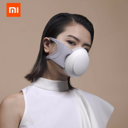

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting images list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)

(7553, 128, 128, 3)


In [ ]:
print(Y.shape)

(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train[[0]]

array([[[[ 50,  72,  23],
         [ 42,  63,  19],
         [ 45,  62,  26],
         ...,
         [180, 165, 145],
         [213, 204, 165],
         [195, 191, 140]],

        [[ 49,  74,  29],
         [ 41,  63,  20],
         [ 45,  65,  26],
         ...,
         [161, 150, 124],
         [245, 242, 193],
         [238, 238, 175]],

        [[ 39,  66,  32],
         [ 42,  67,  28],
         [ 44,  66,  25],
         ...,
         [146, 139, 104],
         [220, 220, 159],
         [195, 200, 120]],

        ...,

        [[206, 223, 110],
         [222, 238, 128],
         [198, 220, 114],
         ...,
         [208, 168, 134],
         [200, 162, 119],
         [195, 159, 108]],

        [[223, 238, 125],
         [208, 226, 116],
         [206, 231, 125],
         ...,
         [229, 181, 139],
         [233, 185, 135],
         [221, 172, 116]],

        [[242, 253, 143],
         [211, 228, 120],
         [200, 226, 122],
         ...,
         [239, 192, 148],
        

In [ ]:
X_train_scaled[0]

array([[[0.19607843, 0.28235294, 0.09019608],
        [0.16470588, 0.24705882, 0.0745098 ],
        [0.17647059, 0.24313725, 0.10196078],
        ...,
        [0.70588235, 0.64705882, 0.56862745],
        [0.83529412, 0.8       , 0.64705882],
        [0.76470588, 0.74901961, 0.54901961]],

       [[0.19215686, 0.29019608, 0.11372549],
        [0.16078431, 0.24705882, 0.07843137],
        [0.17647059, 0.25490196, 0.10196078],
        ...,
        [0.63137255, 0.58823529, 0.48627451],
        [0.96078431, 0.94901961, 0.75686275],
        [0.93333333, 0.93333333, 0.68627451]],

       [[0.15294118, 0.25882353, 0.1254902 ],
        [0.16470588, 0.2627451 , 0.10980392],
        [0.17254902, 0.25882353, 0.09803922],
        ...,
        [0.57254902, 0.54509804, 0.40784314],
        [0.8627451 , 0.8627451 , 0.62352941],
        [0.76470588, 0.78431373, 0.47058824]],

       ...,

       [[0.80784314, 0.8745098 , 0.43137255],
        [0.87058824, 0.93333333, 0.50196078],
        [0.77647059, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - acc: 0.6740 - loss: 0.7100 - val_acc: 0.8661 - val_loss: 0.3051
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8879 - loss: 0.2926 - val_acc: 0.8876 - val_loss: 0.2716
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9114 - loss: 0.2319 - val_acc: 0.9008 - val_loss: 0.2199
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9277 - loss: 0.1870 - val_acc: 0.9074 - val_loss: 0.2295
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9374 - loss: 0.1663 - val_acc: 0.9025 - val_loss: 0.2545
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9576 - loss: 0.1205 - val_acc: 0.9207 - val_loss: 0.2226
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9609 - loss: 0.1049 - val_acc: 0.9174 - val_loss: 0.2455
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9723 - loss: 0.0857 - val_acc: 0.9273 - val_loss: 0.3017
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/

**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9355 - loss: 0.2429
Test accuracy = 0.9351422786712646


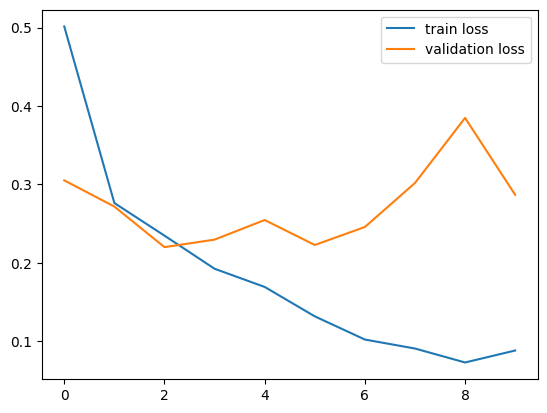

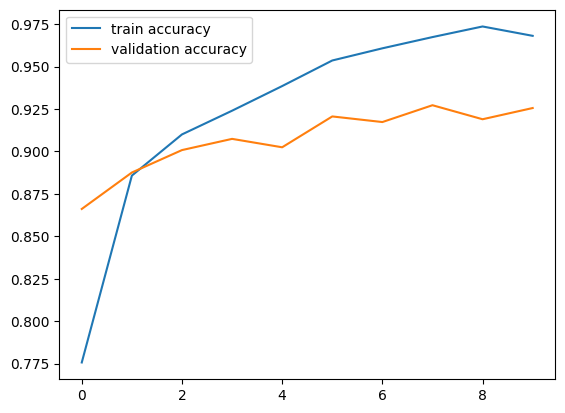

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_2.jpg


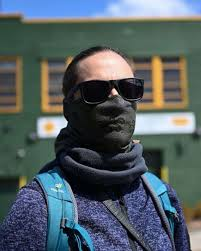

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.02995815 0.99406475]]
1
The person in the image is waring a mask.


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is waring a mask.')
else:
  print('The person in the image in not waring a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1.jpg


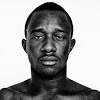

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.92518276 0.04912351]]
0
The person in the image in not waring a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is waring a mask.')
else:
  print('The person in the image in not waring a mask')

In [ ]:
from sklearn.metrics import classification_report

# Get predicted labels
y_pred = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print precision, recall, f1-score
print(classification_report(Y_test, y_pred_labels, target_names=["Without Mask", "With Mask"]))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

Without Mask       0.92      0.95      0.94       768
   With Mask       0.95      0.92      0.93       743

    accuracy                           0.94      1511
   macro avg       0.94      0.93      0.94      1511
weighted avg       0.94      0.94      0.94      1511



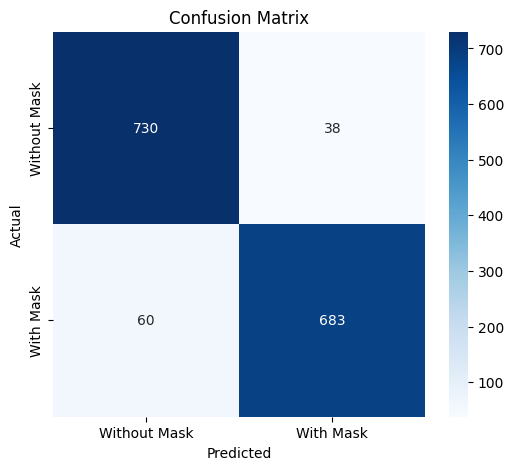

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Without Mask", "With Mask"], yticklabels=["Without Mask", "With Mask"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

